<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Emotion recognition in image and video

**Problem statement:** Perform emotion recognition of faces of presidents attending the G8 summit

## Install packages

In [1]:
#Install face_recognition
!pip -q install face_recognition > /dev/null; echo " done."

 done.


In [2]:
#Install Indicoio 
!git clone https://github.com/IndicoDataSolutions/IndicoIo-Python.git > /dev/null; echo " done."
%cd IndicoIo-Python/
!python setup.py install > /dev/null; echo " done."
import indicoio
%cd ..

Cloning into 'IndicoIo-Python'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 2446 (delta 79), reused 78 (delta 53), pack-reused 2328
Receiving objects: 100% (2446/2446), 2.07 MiB | 16.52 MiB/s, done.
Resolving deltas: 100% (1503/1503), done.
 done.
/content/IndicoIo-Python
zip_safe flag not set; analyzing archive contents...
cythonize: 'msgpack/_unpacker.pyx'
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /tmp/easy_install-u_j2js8w/msgpack-python-0.5.6/msgpack/_unpacker.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
zip_safe flag not set; analyzing archive contents...
msgpack.__pycache__._packer.cpython-36: module references __file__
msgpack.__pycache__._unpacker.cpython-36: module references __file__
 done.
/content


## Load Files and Packages

In [0]:
#Load image and video file
!wget -q https://www.dropbox.com/s/1dhztoyeic45gl8/image_new.jpg
!wget -q https://www.dropbox.com/s/gkpjisom0aiimmm/ezgif.com-video-cutter.mp4

In [0]:
#Load packages
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt

indicoio.config.api_key = '7c73defe638b4f54011edbf1e239ccd2'
%matplotlib inline

## Function for emotion recognition

In [0]:
#Detect emotion using facial emotion recognition package of indicoio

def emotion_detect(img_crop):
  
  d = indicoio.fer(img_crop)
  #Return the value of emotion that is the most prominent
  emotion_max = max(d, key=lambda k: d[k])
  return emotion_max

## Function for Detecting face and finding emotion in images

In [0]:
def face_detect_image(unknown_image):

    face_locations = face_recognition.face_locations(unknown_image)
    pil_image = Image.fromarray(unknown_image)
    
    # Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)

    # Loop through each face found in the unknown image
    for (top, right, bottom, left) in face_locations:
        
        

        # Draw a box around the face using the Pillow module
        draw.rectangle(((left+2, top+2), (right+2, bottom+2)), outline=(0, 0, 255))
        img_crop = np.array(pil_image)[top:bottom,left:right]
        
        # Detect emotion in image for faces
        
        emotion_max = emotion_detect(img_crop)
        
        
        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(emotion_max)
        
        draw.text((right, top - text_height - 5+10), emotion_max , fill=(255, 255, 255, 255))

    # Remove the drawing library from memory as per the Pillow docs
    del draw

    # Display the resulting image
    pil_image.show()
    plt.figure(figsize=(15,15))
    plt.imshow(pil_image)
    #You can also save a copy of the new image to disk if you want by uncommenting this line
    pil_image.save("image_with_boxes.jpg")
    


## Function for Detecting face and finding emotion in videos 

In [0]:
def face_detect(video_file):
	# Open the input movie file
	input_movie = cv2.VideoCapture(video_file)
	length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

	# Create an output movie file (make sure resolution/frame rate matches input video!)
	fourcc = cv2.VideoWriter_fourcc(*'XVID')
	output_movie = cv2.VideoWriter('output_talks_g20_final.avi', fourcc, 29.97, (1280, 720))


	# Initialize some variables
	face_locations = []
	frame_number = 0

	while True:
		# Grab a single frame of video
		ret, frame = input_movie.read()
		frame_number += 1

		# Quit when the input video file ends
		if not ret:
			break

		# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
		rgb_frame = frame[:, :, ::-1]

		# Find all the faces and face encodings in the current frame of video
		face_locations = face_recognition.face_locations(rgb_frame)


    # Label the results
		for (top, right, bottom, left) in face_locations:
			
				

      # Draw a box around the face
			cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
			img_crop = frame[top:bottom,left:right]
        
			# Detect emotion in image for faces
			emotion_max = emotion_detect(img_crop)

      # Draw a label with a name below the face
			cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
			font = cv2.FONT_HERSHEY_DUPLEX
			cv2.putText(frame, emotion_max, (left + 16, bottom - 26), font, 0.8, (255, 255, 255), 1)
      
    # Write the resulting image to the output video file
		print("Writing frame {} / {}".format(frame_number, length))
		output_movie.write(frame)

# All done!
	input_movie.release()
	cv2.destroyAllWindows()


## Recognition of emotions in images and videos 

### Emotion recognition on images

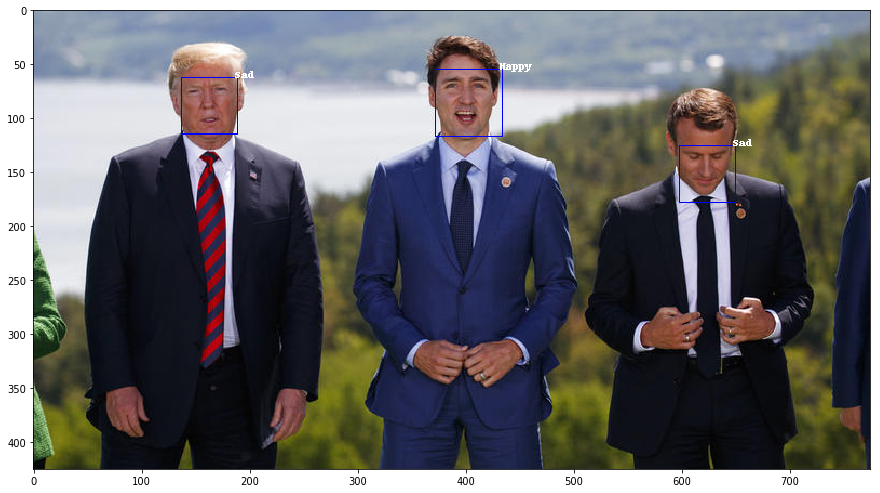

In [8]:
from PIL import Image, ImageDraw
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("image_new.jpg")
# Find all the faces and face encodings in the unknown image
face_detect_image(unknown_image) 

### Emotion recognition on a video file

In [9]:
# Load a video 
video_file_name="ezgif.com-video-cutter.mp4"
# Find all the faces and face encodings in the unknown video
face_detect(video_file_name)

Writing frame 1 / 579
Writing frame 2 / 579
Writing frame 3 / 579
Writing frame 4 / 579
Writing frame 5 / 579
Writing frame 6 / 579
Writing frame 7 / 579
Writing frame 8 / 579
Writing frame 9 / 579
Writing frame 10 / 579
Writing frame 11 / 579
Writing frame 12 / 579
Writing frame 13 / 579
Writing frame 14 / 579
Writing frame 15 / 579
Writing frame 16 / 579
Writing frame 17 / 579
Writing frame 18 / 579
Writing frame 19 / 579
Writing frame 20 / 579
Writing frame 21 / 579
Writing frame 22 / 579
Writing frame 23 / 579
Writing frame 24 / 579
Writing frame 25 / 579
Writing frame 26 / 579
Writing frame 27 / 579
Writing frame 28 / 579
Writing frame 29 / 579
Writing frame 30 / 579
Writing frame 31 / 579
Writing frame 32 / 579
Writing frame 33 / 579
Writing frame 34 / 579
Writing frame 35 / 579
Writing frame 36 / 579
Writing frame 37 / 579
Writing frame 38 / 579
Writing frame 39 / 579
Writing frame 40 / 579
Writing frame 41 / 579
Writing frame 42 / 579
Writing frame 43 / 579
Writing frame 44 / 5

### Display output video file with detected faces and emotions

In [10]:
# Import the required modules
%pylab inline 
import cv2
from IPython.display import clear_output

# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv2.VideoCapture("output_talks_g20_final.avi")

try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print ("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Turn off the axis
        axis('off')
        
        # Title of the window
        title("Input Stream")
        # Display the frame
        figsize(20,10)
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource
